# # Classification on Iris Dataset

### Dataset description

We will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Iris).
The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

- Iris-setosa (n=50)

- Iris-versicolor (n=50)

- Iris-virginica (n=50)



### Four features (regressors) are considered for the Iris dataset:



1) sepal length in cm

2) sepal width in cm

3) petal length in cm

4) petal width in cm




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Load the data from a .csv file

In [2]:
from __future__ import division
import pandas as pd
import numpy as np

df = pd.read_csv('irisData.csv', sep = ',')
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Save the features and class names for future use

In [3]:
features_list = ['sepal length', 'sepal width', 'petal length', 'petal width']
labels_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


Create data matrices

In [4]:
Data = df.values
X = Data[:-1,:-1]
Y = Data[:-1,-1]
n = X.shape[1]  # number of features

## Data Preprocessing

Change the class labels from strings to integers

In [5]:
# Rename the class labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

Given $N$ total data points, keep $N_t$ data points as training data and $N_{val}:=N-N_t$ as validation data. Splitting is random, use as seed your ``numero di matricola'' (see below)


In [6]:
# Split data into training and validation data
from sklearn.cross_validation import train_test_split
N = np.shape(X)[1]
Numero_di_Matricola = 1067494 #put here your ``numero di matricola''
Nt = int(0.50*N)  # use 50% data for training and 50% for validation

Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size=Nt/N,random_state = Numero_di_Matricola)

Ntr = Xtr.shape[0]
Nva = Xva.shape[0]
print Ntr, Nva

74 74


Design matrix is standardized to have zero-mean and unit variance (columnwise) [WHY?]


In [7]:
# Standardize the Features Matrix
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xtr = scaler.transform(Xtr)
Xva = scaler.transform(Xva)  # use the same transformation on validation data

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Linear Classification

Convert the label vector Y into an indicator matrix (i.e. to a collection of one-hot vectors). 
$$Y_{oh} \in\mathbb{R}^{N_t\times K},\qquad [Y_{oh}]_{ij} = \left\{\begin{array}{ll}1 & \mbox{if  } Y_i=j\\ 0 & \mbox{ otherwise}\end{array} \right.$$
$K$ denotes the number of classes.

You can use the class OneHotEncoder from Scikit-Learn.

In [8]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
Ytr_oh = onehot_encoder.fit_transform(Ytr.reshape(-1,1)).toarray()
Yva_oh = onehot_encoder.fit_transform(Yva.reshape(-1,1)).toarray()

## TO DO 1
### Perform Linear Regression on the Indicator matrix

You can use the linear_model class from package sklearn

-  the regression model should be assinged to the variable reg

- you can use the function fit (reg.fit) for fitting the linear regression

In [9]:
# Perform Linear Regression on an Indicator Matrix
from sklearn import linear_model
reg =  linear_model.LinearRegression() # define a linear model 

reg.fit(Xtr, Ytr) # then you have to fit the model using training data 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## TO DO 2

### Data Prediction

 - Compute the predicted labels on training and validation data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).

In [10]:
Yhat_tr_LS = reg.predict(Xtr) # preciction on training data
Yhat_va_LS = reg.predict(Xva)  # preciction on validation data


Yhat_tr_LS_oh = onehot_encoder.fit_transform(np.rint(Yhat_tr_LS).reshape(-1,1)).toarray()
Yhat_va_LS_oh = onehot_encoder.fit_transform(np.rint(Yhat_va_LS).reshape(-1,1)).toarray()


from sklearn import metrics
print "Training Accuracy:", 100*metrics.accuracy_score(Ytr_oh, Yhat_tr_LS_oh )   # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn 
print "Validation Accuracy:", 100*metrics.accuracy_score(Yva_oh, Yhat_va_LS_oh ) # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn 

Training Accuracy: 98.6486486486
Validation Accuracy: 95.9459459459


## TO DO 3

### Repeat the same using only two features (so that we can plot)

- features is the index vector of selected features (colums of X)
- Xtr_red will be  the reduced design matrix (training) 
- Xva_red will be the reduced design matrix (validation) 




In [11]:
features = [1,3]  # chose two 
Xtr_red = Xtr[:,features]
Xva_red = Xva[:,features]

reg_red = linear_model.LinearRegression() 
reg_red.fit(Xtr_red, Ytr_oh) # define and fit model 


Yhat_tr_LS_red = reg_red.predict(Xtr_red) #prediction with two features (training data)
Yhat_va_LS_red = reg_red.predict(Xva_red) #prediction with two features (validation  data)


Yhat_tr_LS_red_oh = onehot_encoder.fit_transform(np.argmax((Yhat_tr_LS_red),1).reshape(-1,1)).toarray()
Yhat_va_LS_red_oh = onehot_encoder.fit_transform(np.argmax((Yhat_va_LS_red),1).reshape(-1,1)).toarray()


print "Training Accuracy reduced features:",  100*metrics.accuracy_score(Ytr_oh,Yhat_tr_LS_red_oh )
print "Validation Accuracy  reduced features:",  100*metrics.accuracy_score(Yva_oh,Yhat_va_LS_red_oh )




Training Accuracy reduced features: 83.7837837838
Validation Accuracy  reduced features: 85.1351351351


### The following function is for you to visualize classification results  when using two features
- X is the design matrix
- Y is the output
- Yhat is the predicted output
- model contains the coefficients of the linear discriminat functions (e.g. from linear regression above)
- features is the vector of indexes used as feautures (only for plotting purposes)

In [12]:
def plot_LinearRegressionClassifier(X, Y, Yhat, model, features):
    K = int(Y.max()+1)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() +  .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() +  .5
    xs = np.arange(x_min, x_max, 0.005)  
    
    fig, axes = plt.subplots(K,1)
    
    
    fig.set_size_inches(7, 12)
    
    idx_class = []
    idx_not_class = []
    idx_class_est =[]
    
    index = np.array(range(K))
    
    for i in index:

        axes[i].set_aspect('equal')
        axes[i].set_title('Class '+ labels_list[i] + ' versus the rest')
        axes[i].set_xlabel(features_list[features[0]])
        axes[i].set_ylabel(features_list[features[1]])
        axes[i].set_xlim(x_min, x_max)
        axes[i].set_ylim(y_min, y_max)
        
         
         
        idx_class.insert(i, np.argwhere(Y == i).reshape(-1,))
        idx_not_class.insert(i, np.argwhere(Y != i).reshape(-1,))
        idx_class_est.insert(i, np.argwhere(Yhat == i).reshape(-1,))
        
       
        
        axes[i].scatter(X[idx_class_est[i], 0], X[idx_class_est[i], 1], c='y', alpha=0.6,marker='d',s=150)
        
        axes[i].scatter(X[idx_class[i], 0], X[idx_class[i], 1], c='r', alpha=0.6, s=50)
      
        axes[i].scatter(X[idx_not_class[i], 0], X[idx_not_class[i], 1], c='b', alpha=0.6,s=50)
        
        
        idx_compare = np.hstack(((range(i)),range(i+1,K)))
       
        idx_compare = index[index!=i]
     
                                
       
        ys0 =( (model.intercept_[i]-model.intercept_[idx_compare[0]]) + xs * (model.coef_[i, 0]-model.coef_[idx_compare[0], 0])) / (model.coef_[idx_compare[0], 1]-model.coef_[i, 1])
        axes[i].plot(xs, ys0, 'k') 
        
        ys1 = ( (model.intercept_[i]-model.intercept_[idx_compare[1]]) + xs * (model.coef_[i, 0]-model.coef_[idx_compare[1], 0])) / (model.coef_[idx_compare[1], 1]-model.coef_[i, 1])
        axes[i].plot(xs, ys1, 'b') 
        
        
        vec_ind = np.argwhere(ys0<ys1).reshape(-1,)
        flag = 0
        
        if vec_ind.shape[0] == 0:
            ind_intersection = 0 
            
        else:
            
             ind_intersection = vec_ind.min()
                
             if ind_intersection==0:
                    ind_intersection = vec_ind.max()
                    flag = 1
        
        ind_intersection = int(ind_intersection)
            
        xmin, xmax, ymin, ymax = axes[i].axis()
        
        
        if (model.coef_[idx_compare[0], 1]-model.coef_[i, 1])<0:
            if (model.coef_[idx_compare[1], 1]-model.coef_[i, 1])<0:
                
                if flag:
                    axes[i].fill_between(xs[0:ind_intersection+1], ys1[0:ind_intersection+1], ymax,alpha=0.1)
                    axes[i].fill_between(xs[ind_intersection:], ys0[ind_intersection:], ymax,alpha=0.1)
                else:
                    axes[i].fill_between(xs[0:ind_intersection+1], ys0[0:ind_intersection+1], ymax,alpha=0.1)
                    axes[i].fill_between(xs[ind_intersection:], ys1[ind_intersection:], ymax,alpha=0.1)
                
            else:
                if flag:
                    axes[i].fill_between(xs[0:ind_intersection], ys0[0:ind_intersection], ys1[0:ind_intersection],alpha=0.1) 
                else:
                    axes[i].fill_between(xs[ind_intersection:], ys0[ind_intersection:], ys1[ind_intersection:],alpha=0.1) 
               
        else:
            if (model.coef_[idx_compare[1], 1]-model.coef_[i, 1])<0:
                if flag:
                    axes[i].fill_between(xs[ind_intersection:], ys1[ind_intersection:], ys0[ind_intersection:],alpha=0.1)
                else:
                    axes[i].fill_between(xs[0:ind_intersection], ys1[0:ind_intersection], ys0[0:ind_intersection],alpha=0.1)
              
            
            else:
                if flag:
                    axes[i].fill_between(xs[ind_intersection:], ymin, ys1[ind_intersection:],alpha=0.1)
                    axes[i].fill_between(xs[0:ind_intersection+1], ymin, ys0[0:ind_intersection+1],alpha=0.1) 
                else:
                    axes[i].fill_between(xs[ind_intersection:], ymin, ys0[ind_intersection:],alpha=0.1)
                    axes[i].fill_between(xs[0:ind_intersection+1], ymin, ys1[0:ind_intersection+1],alpha=0.1) 
 
        
       
        #ys = ( - reg_red.intercept_[1] - xs * reg_red.coef_[1, 0]) / reg_red.coef_[1, 1]
        #axes[i].plot(xs, ys, 'b') 
        #ys = ( - reg_red.intercept_[2] - xs * reg_red.coef_[2, 0]) / reg_red.coef_[2, 1]
        #axes[i].plot(xs, ys, 'r') 
    plt.tight_layout()


    

## Now we are ready to visualize

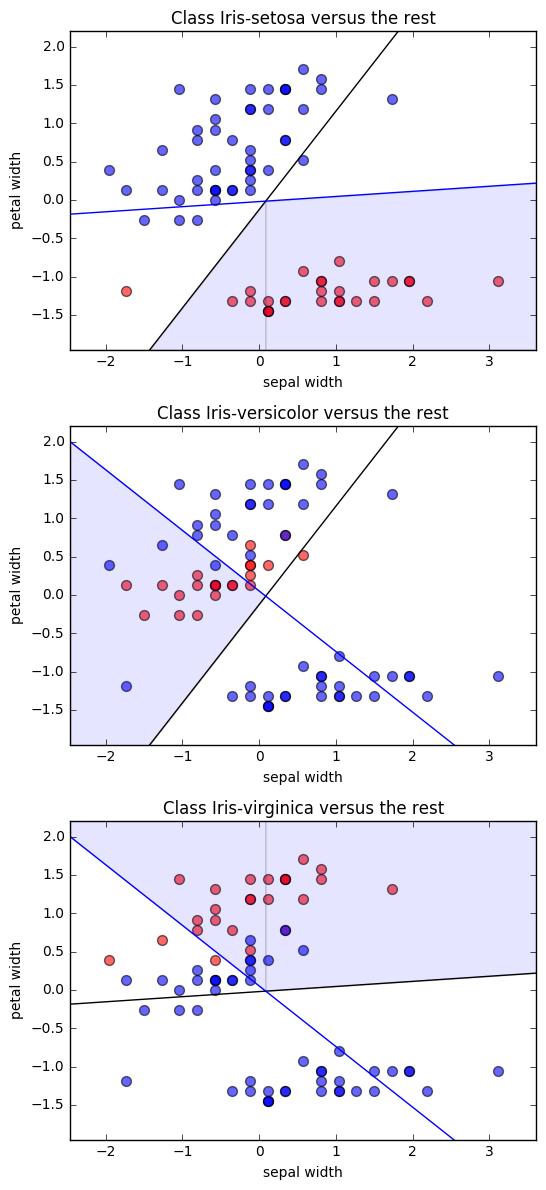

In [13]:
plot_LinearRegressionClassifier(Xva_red, Yva, Yhat_va_LS_red, reg_red, features)


## Linear Discriminant Analysis

Linear dscriminant analysis is a technique we shall introduce tomorrow in class. It is a linear classifier in the sense that the separation between classes is provided by a  linear rule. It is essentially based in the assumption that, the for each data pair $(x,y)$, $y \in {\cal G}$, ${\cal G}=\{1,2,...,K\}$, the distribution of $x$ under the condition that $y=k$ (i.e. that $x$ belongs to the $k-th$ class), $x$ is normally distributed with mean $\mu_k$ and variance $\Sigma$ (indipendent of the class label $y$), i.e.:

$$
 x \; | \; y = k \sim {\cal N}(\mu_k, \Sigma)
 $$



In the meantime, we can see how it performs on the Iris dataset. By tomorrow you will be able to understand the main steps. 

### Step 1 (prior probabilities)

Estimate the prior probabilities for each class as $$\hat{\pi}_k = \frac{N_k}{N}$$ where $N_k$ is the number of occurrences of class $k$ in the training data.

### TO DO 4
- compute priors probabiliies according to equation above

In [14]:
# Compute prior probabilities for each class
pi = np.sum(Ytr_oh,0)/Ntr
print pi

[ 0.2972973   0.37837838  0.32432432]


### Step 2 (class centroids)

Estimate the class centroids as $$\hat{\mu}_k = \frac{1}{N_k} \sum_{i:y_i=k} x_i$$

### TO DO 5
- compute class centroids  according to equation above

In [15]:
# Compute  class centroids
mu = np.zeros((K,n))

for i in range(K):
    for j in range(n) :
       mu[i,j] = np.dot(Ytr_oh[:,i],Xtr[:,j])/np.sum(Ytr_oh,0)[i]
print mu
# mu[i,:] will be centroid for class i 

[[-1.07277359  0.87770642 -1.31845584 -1.31806931]
 [ 0.18347831 -0.74462736  0.27788206  0.14865443]
 [ 0.81206141 -0.24342159  0.98521904  1.06222275]]


### Step 3 (covariance matrix) 

Estimate the class covariance matrix (postulating all classes have the same variance) as
$$\hat{\Sigma} = \frac{1}{N-K} \sum_{k=1}^K \sum_{i:y_i=k} (x_i - \mu_k)(x_i -\mu_k)^\top$$

### TO DO 6
- compute covariance matrix according to equation above

In [16]:
# Compute class covariance matrix
Sigma = np.zeros((n,n))
for i in range(Ntr):
    Sigma += np.dot((Xtr[i,:]-mu[Ytr[i],:]).reshape(1,-1).transpose(),(Xtr[i,:]-mu[Ytr[i],:]).reshape(1,-1))   
Sigma = Sigma/(Ntr-K)    
print Sigma


[[ 0.39989223  0.29628789  0.12686004  0.06031848]
 [ 0.29628789  0.62396802  0.08744757  0.09363796]
 [ 0.12686004  0.08744757  0.06664217  0.03240118]
 [ 0.06031848  0.09363796  0.03240118  0.06619634]]


### Step 4 (class predictions)

For each class compute the linear discriminant function $\delta_k(\cdot)$ as 
$$\delta_k(x) = x^\top \hat{\Sigma}^{-1}\mu_k - \frac{1}{2} \mu_k^\top \hat{\Sigma}^{-1}\mu_k + \log\pi_k$$
and classify training and validation data as
$$G(x) = \arg\max_k \delta_k(x)$$

Evaluate the accuracy using metrics.accuracy_score from scikit-learn.

### TO DO 7
- compute linear discriminant functions according to equation above. Follow the structure below. Fill in the predefined functions. 

In [17]:

# Compute the linear discriminant function
def linear_discriminant_function(x, mu, Sigmai, pi):
    # x: new point ( shape (n,) )
    # mu: mean vector for a specific class ( shape: (n,) )
    # Sigmai: inverse class covariance matrix ( shape: (n,n) )
    # pi: prior for a specific class ( scalar )
 
    disc_k=np.dot(np.dot(x.transpose(),Sigmai),mu)-1/2*np.dot(np.dot(mu.transpose(),Sigmai),mu)+np.log(pi)

    return disc_k
    

# Compute the class prediction
def predict_class(X, mu, Sigmai, pi):
    # X: data matrix ( shape: (N,n) )
    # mu: matrix containing the means of all ( shape: (K,n) )
    # Sigmai: inverse class covariance matrix ( shape: (n,n) )
    # pi: prior for a specific class ( shape: (n,) )
 
    # COMPUTE PREDICTIONS  (predictions)
    # COMPUTE DISCRIMINANTS (delta)

    predictions=np.zeros((X.shape[0],1))
    delta=np.zeros((X.shape[0],mu.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(mu.shape[0]):
            delta[i,j]=linear_discriminant_function(X[i,:],mu[j,:],Sigmai,pi[j])
        predictions[i,0]=np.argmax(delta[i,:])
    
    return predictions, delta

    
# Compute class predictions on training and validation data (using the two functions above)

Sigmai=np.linalg.inv(Sigma)
Yhat_tr_LDA, delta_tr = predict_class(Xtr, mu, Sigmai, pi)
Yhat_va_LDA, delta_va = predict_class(Xva, mu, Sigmai, pi)

Yhat_tr_LDA, delta_tr = predict_class(Xtr, mu, Sigmai, pi)
Yhat_va_LDA, delta_va = predict_class(Xva, mu, Sigmai, pi)
print "Training Accuracy:", 100*metrics.accuracy_score(Ytr, Yhat_tr_LDA)
print "Validation Accuracy:", 100*metrics.accuracy_score(Yva, Yhat_va_LDA)


Training Accuracy: 98.6486486486
Validation Accuracy: 97.2972972973


## LDA using scikit-learn built-in routine

For comparison we provide the solution using the build-in scikit-learn routine

In [18]:
# LDA using scikit learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
clf.fit(Xtr, Ytr)
Yhat_tr_LDA_sc = clf.predict(Xtr) 
Yhat_va_LDA_sc = clf.predict(Xva) 
print "Training Accuracy:", 100*metrics.accuracy_score(Ytr, Yhat_tr_LDA_sc)
print "Validation Accuracy:", 100*metrics.accuracy_score(Yva, Yhat_va_LDA_sc)

Training Accuracy: 98.6486486486
Validation Accuracy: 97.2972972973


## Model Reduction: LDA using 2 features

Perform the classification on the same training and validation data but using only 2 features (choose those giving the best accuracy).

Compare the results with the previous one.

Use the code below to plot the points in the features space and the separating hyperplanes computed by LDA.

Training Accuracy: 98.6486486486
Validation Accuracy: 93.2432432432


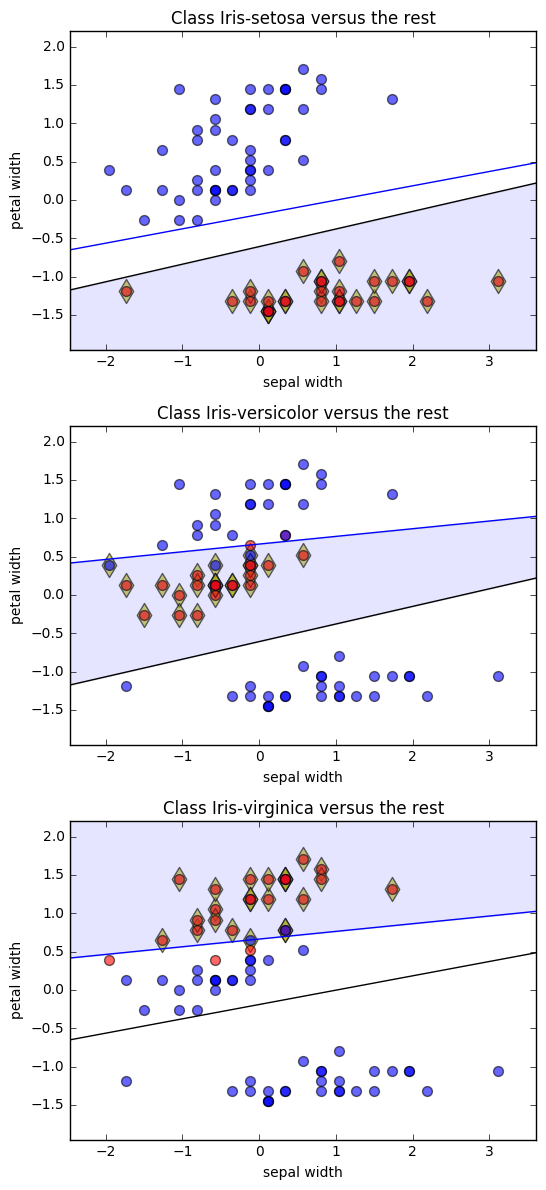

In [19]:
# LDA using 2 features as above


clf2 = LDA()
clf2.fit(Xtr_red, Ytr)
Yhat_tr_LDA2 = clf2.predict(Xtr_red) 
Yhat_va_LDA2 = clf2.predict(Xva_red) 
print "Training Accuracy:", 100*metrics.accuracy_score(Ytr, Yhat_tr_LDA2)
print "Validation Accuracy:", 100*metrics.accuracy_score(Yva, Yhat_va_LDA2)



plot_LinearRegressionClassifier(Xva_red, Yva, Yhat_va_LDA2, clf2, features)



The two features giving the best results are : 1 and 3 ∈ {0,1,2,3}. They lead to an accuracy on the training set as good as the one wich was obtained using all features, but the accuracy on the validation set is a little (around 4% points) smaller. 


## TO DO 8

### Compute LDA directly 

- write the function below which outputs the variables:

 1) reg_LDA (a linear model with linear discriminant functions)
 2) Yhat_tr_LDA (Predcition on trainign data, as done above) 
 3) evaluated discriminant functions delta_tr (on training data) 
 4) Yhat_va_LDA, delta_va: As above but for validation data


In [20]:
def Compute_parameters_LDA(X, Y, Xva):

    K=Y[np.argmax(Y)]+1
    n=X.shape[1]
    Y_oh = onehot_encoder.fit_transform(Y.reshape(-1,1)).toarray()
    
    #mu
    
    mu = np.zeros((K,n))

    for i in range(K):
        for j in range(n) :
           mu[i,j] = np.dot(Y_oh[:,i],X[:,j])/np.sum(Y_oh,0)[i]
        
    #Sigmai 
    
    Sigma = np.zeros((n,n))
    for i in range(X.shape[0]):
        Sigma += np.dot((X[i,:]-mu[Y[i],:]).reshape(1,-1).transpose(),(X[i,:]-mu[Y[i],:]).reshape(1,-1))   
    Sigma = Sigma/(Ntr-K)  
    Sigmai=np.linalg.inv(Sigma)


    #pi 
    
    pi = np.sum(Y_oh,0)/Y.shape[0]
    
    
    # compute intercept of discriminant functions (defined above in step 4)

    intercept = -1/2*np.diagonal(np.dot(np.dot(mu,Sigmai),mu.transpose())).copy()#+np.log(pi)
 
    
    # compute coefficients of discriminant functions (defined above in step 4)
    
    coef      =  np.dot(Sigmai,mu.transpose()).transpose()
    
    # reg_LDA
    
    reg_LDA = linear_model.LinearRegression()
    reg_LDA.intercept_=intercept
    reg_LDA.coef_=coef
    
    #Yhat_tr_LDA,  delta_tr, Yhat_va_LDA, delta_va
    
    Yhat_tr_LDA, delta_tr = predict_class(X, mu, Sigmai, pi)
    Yhat_va_LDA, delta_va = predict_class(Xva, mu, Sigmai, pi)

    return reg_LDA,  Yhat_tr_LDA,  delta_tr, Yhat_va_LDA, delta_va

### Once you are done with the above, you can plot the results as done before, using the code below

Training Accuracy: 98.6486486486
Validation Accuracy: 93.2432432432


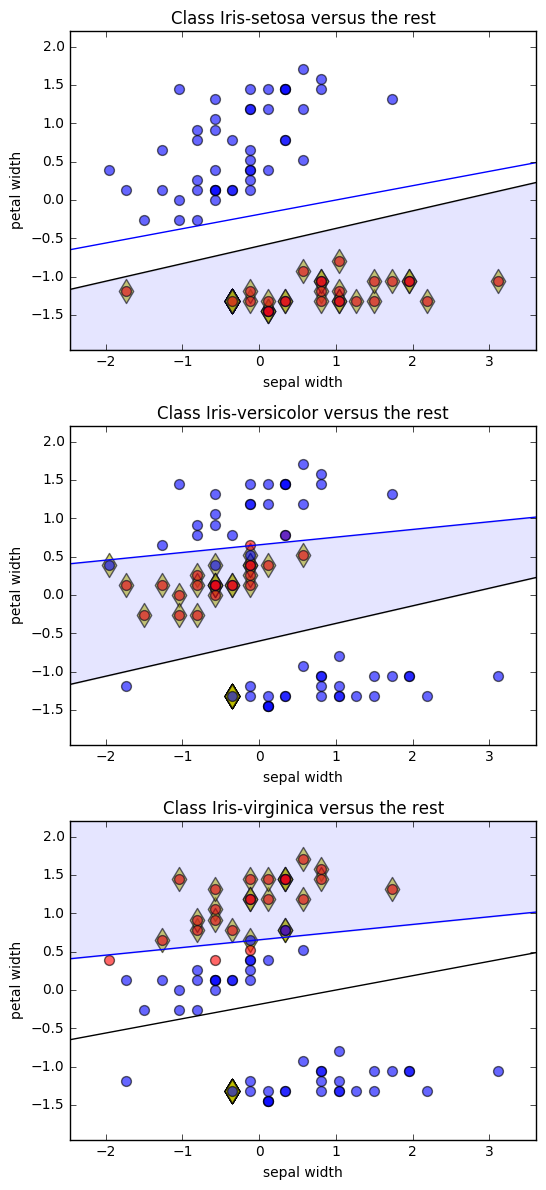

In [21]:
reg_LDA, Yhat_tr_LDA2_1,  delta_tr2_1, Yhat_va_LDA2_1, delta_va2_1 = Compute_parameters_LDA(Xtr_red, Ytr, Xva_red)

print "Training Accuracy:", 100*metrics.accuracy_score(Ytr, Yhat_tr_LDA2_1)
print "Validation Accuracy:", 100*metrics.accuracy_score(Yva, Yhat_va_LDA2_1)

#print reg_LDA.intercept_
#print reg_LDA.coef_

plot_LinearRegressionClassifier(Xva_red, Yva, Yhat_va_LDA2_1, reg_LDA, features)

